# Background & Context

There is a huge demand for used cars in the Indian Market today. As sales of new cars have slowed down in the recent past, the pre-owned car market has continued to grow over the past years and is larger than the new car market now. Cars4U is a budding tech start-up that aims to find footholes in this market.

In 2018-19, while new car sales were recorded at 3.6 million units, around 4 million second-hand cars were bought and sold. There is a slowdown in new car sales and that could mean that the demand is shifting towards the pre-owned market. In fact, some car sellers replace their old cars with pre-owned cars instead of buying new ones. Unlike new cars, where price and supply are fairly deterministic and managed by OEMs (Original Equipment Manufacturer / except for dealership level discounts which come into play only in the last stage of the customer journey), used cars are very different beasts with huge uncertainty in both pricing and supply. Keeping this in mind, the pricing scheme of these used cars becomes important in order to grow in the market.

As a senior data scientist at Cars4U, you have to come up with a pricing model that can effectively predict the price of used cars and can help the business in devising profitable strategies using differential pricing. For example, if the business knows the market price, it will never sell anything below it. 

# Objective

* Explore and visualize the dataset.

* Build a linear regression model to predict the prices of used cars.

* Generate a set of insights and recommendations that will help the business.

**Data Dictionary -** 

S.No. : Serial Number

Name : Name of the car which includes Brand name and Model name

Location : The location in which the car is being sold or is available for purchase Cities

Year : Manufacturing year of the car

Kilometers_driven : The total kilometers driven in the car by the previous owner(s) in KM.

Fuel_Type : The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)

Transmission : The type of transmission used by the car. (Automatic / Manual)

Owner : Type of ownership

Mileage : The standard mileage offered by the car company in kmpl or km/kg

Engine : The displacement volume of the engine in CC.

Power : The maximum power of the engine in bhp.

Seats : The number of seats in the car.

New_Price : The price of a new car of the same model in INR Lakhs.(1 Lakh = 100, 000)

Price : The price of the used car in INR Lakhs (1 Lakh = 100, 000)

In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

# Loading libraries

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit from the number of displayed columns and rows.
# This is so I can see the entire dataframe when I  print it
pd.set_option("display.max_columns", None)
# pd.set_option('display.max_rows', None)
pd.set_option("display.max_rows", 200)

# To build linear model for statistical analysis and prediction
import statsmodels.stats.api as sms

<IPython.core.display.Javascript object>

# Loading and exploring the data

Loading the data into python to explore and understand it.

In [3]:
df = pd.read_csv("used_cars_data.csv")
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns.")  # f-string

np.random.seed(1)  # To get the same random results every time
df.sample(n=10)

There are 7253 rows and 14 columns.


,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
2397,2397,Ford EcoSport 1.5 Petrol Trend,Kolkata,2016,21460,Petrol,Manual,First,17.0 kmpl,1497 CC,121.36 bhp,5.0,9.47 Lakh,6.00
3777,3777,Maruti Wagon R VXI 1.2,Kochi,2015,49818,Petrol,Manual,First,21.5 kmpl,1197 CC,81.80 bhp,5.0,5.44 Lakh,4.11
4425,4425,Ford Endeavour 4x2 XLT,Hyderabad,2007,130000,Diesel,Manual,First,13.1 kmpl,2499 CC,141 bhp,7.0,NaN,6.00
3661,3661,Mercedes-Benz E-Class E250 CDI Avantgrade,Coimbatore,2016,39753,Diesel,Automatic,First,13.0 kmpl,2143 CC,201.1 bhp,5.0,NaN,35.28
4514,4514,Hyundai Xcent 1.2 Kappa AT SX Option,Kochi,2016,45560,Petrol,Automatic,First,16.9 kmpl,1197 CC,82 bhp,5.0,NaN,6.34
599,599,Toyota Innova Crysta 2.8 ZX AT,Coimbatore,2019,40674,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,7.0,28.05 Lakh,24.82
186,186,Mercedes-Benz E-Class E250 CDI Avantgrade,Bangalore,2014,37382,Diesel,Automatic,First,13.0 kmpl,2143 CC,201.1 bhp,5.0,NaN,32.00
305,305,Audi A6 2011-2015 2.0 TDI Premium Plus,Kochi,2014,61726,Diesel,Automatic,First,17.68 kmpl,1968 CC,174.33 bhp,5.0,NaN,20.77
4582,4582,Hyundai i20 1.2 Magna,Kolkata,2011,36000,Petrol,Manual,First,18.5 kmpl,1197 CC,80 bhp,5.0,NaN,2.50
5434,5434,Honda WR-V Edge Edition i-VTEC S,Kochi,2019,13913,Petrol,Manual,First,17.5 kmpl,1199 CC,88.7 bhp,5.0,9.36 Lakh,8.20


<IPython.core.display.Javascript object>

`S.No.` is just an index for the data entry. In all likelihood, this column will not be a significant factor in determining the price of the car. 
Having said that, there are instances where the index of the data entry contains the information about time factor (an entry with a smaller index corresponds to data entered years ago). Therefore, we will not drop this variable just yet. Let us see if there is any relationship with the price when we do bivariate analysis.

`Car names` contain a lot of model information. Let us check how many individual names we have. If they are too many, we can process this column to extract important information.

`Mileage`, `Engine` and `Power` will also need some processing before we are able to explore them. We'll have to extract numerical information from these columns.

`New Price` column also needs some processing. This one also contains strings and a lot of missing values.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


<IPython.core.display.Javascript object>

As expected, `Mileage`, `Engine`, `Power` and `New_Price` are objects when they should ideally be numerical. To be able to get summary statistics for these columns, We will have to process them first.

# Processing Columns

Let us process 'Mileage', 'Engine', 'Power' and 'New_Price' and extract numerical values from them.

#### 1. Mileage

We have car mileage in two units, kmpl and km/kg.

After a quick research on the internet it is clear that these 2 units are used for cars of 2 different fuel types.

kmpl - kilometers per litre - is used for petrol and diesel cars.
km/kg - kilometers per kg - is used for CNG and LPG based engines.

We have the variable `Fuel_type` in our data. Let us check if this observations holds true in our data also.

In [5]:
# Create 2 new columns after splitting the mileage values.
km_per_unit_fuel = []
mileage_unit = []

for observation in df["Mileage"]:
    if isinstance(observation, str):
        if (
            observation.split(" ")[0]
            .replace(".", "", 1)
            .isdigit()  # first element should be numeric
            and " " in observation  # space between numeric and unit
            and (
                observation.split(" ")[1]
                == "kmpl"  # units are limited to "kmpl" and "km/kg"
                or observation.split(" ")[1] == "km/kg"
            )
        ):
            km_per_unit_fuel.append(float(observation.split(" ")[0]))
            mileage_unit.append(observation.split(" ")[1])
        else:
            # To detect if there are any observations in the column that do not follow
            # the expected format [number + ' ' + 'kmpl' or 'km/kg']
            print(
                "The data needs further processing. All values are not similar ",
                observation,
            )
    else:
        # If there are any missing values in the mileage column,
        # we add corresponding missing values to the 2 new columns
        km_per_unit_fuel.append(np.nan)
        mileage_unit.append(np.nan)

<IPython.core.display.Javascript object>

In [6]:
# No print output from the function above. The values are all in the expected format or NaNs
# Add the new columns to the data

df["km_per_unit_fuel"] = km_per_unit_fuel
df["mileage_unit"] = mileage_unit

# Checking the new dataframe
df.head(5)  # looks good!

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,km_per_unit_fuel,mileage_unit
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,26.60,km/kg
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,19.67,kmpl
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,18.20,kmpl
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,20.77,kmpl
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,15.20,kmpl


<IPython.core.display.Javascript object>

In [7]:
# Let us check if the units correspond to the fuel types as expected.
df.groupby(by=["Fuel_Type", "mileage_unit"]).size()

Fuel_Type  mileage_unit
CNG        km/kg             62
Diesel     kmpl            3852
LPG        km/kg             12
Petrol     kmpl            3325
dtype: int64

<IPython.core.display.Javascript object>

As expected, km/kg is for CNG/LPG cars and kmpl is for Petrol and Diesel cars.

#### 2. Engine 

The data dictionary suggests that `Engine` indicates the displacement volume of the engine in CC.
We will make sure that all the observations follow the same format - [numeric + " " + "CC"] and create a new numeric column from this column. 

This time, lets use a regrex to make all the neccesary checks.

In [8]:
# re module provides support for regular expressions
import re

# Create a new column after splitting the engine values.
engine_num = []

# Regex for numeric + " " + "CC"  format
regex_engine = "^\d+(\.\d+)? CC$"

for observation in df["Engine"]:
    if isinstance(observation, str):
        if re.match(regex_engine, observation):
            engine_num.append(float(observation.split(" ")[0]))
        else:
            # To detect if there are any observations in the column that do not follow [numeric + " " + "CC"]  format
            print(
                "The data needs furthur processing. All values are not similar ",
                observation,
            )
    else:
        # If there are any missing values in the engine column, we add missing values to the new column
        engine_num.append(np.nan)

<IPython.core.display.Javascript object>

In [9]:
# No print output from the function above. The values are all in the same format - [numeric + " " + "CC"] OR NaNs
# Add the new column to the data

df["engine_num"] = engine_num

# Checking the new dataframe
df.head(5)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,km_per_unit_fuel,mileage_unit,engine_num
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,26.60,km/kg,998.0
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,19.67,kmpl,1582.0
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,18.20,kmpl,1199.0
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,20.77,kmpl,1248.0
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,15.20,kmpl,1968.0


<IPython.core.display.Javascript object>

#### 3. Power 

The data dictionary suggests that `Power` indicates the maximum power of the engine in bhp.
We will make sure that all the observations follow the same format - [numeric + " " + "bhp"] and create a new numeric column from this column, like we did for `Engine`

In [10]:
# Create a new column after splitting the power values.
power_num = []

# Regex for numeric + " " + "bhp"  format
regex_power = "^\d+(\.\d+)? bhp$"

for observation in df["Power"]:
    if isinstance(observation, str):
        if re.match(regex_power, observation):
            power_num.append(float(observation.split(" ")[0]))
        else:
            # To detect if there are any observations in the column that do not follow [numeric + " " + "bhp"]  format
            # that we see in the sample output
            print(
                "The data needs furthur processing. All values are not similar ",
                observation,
            )
    else:
        # If there are any missing values in the power column, we add missing values to the new column
        power_num.append(np.nan)

The data needs furthur processing. All values are not similar  null bhp
The data needs furthur processing. All values are not similar  null bhp
The data needs furthur processing. All values are not similar  null bhp
The data needs furthur processing. All values are not similar  null bhp
The data needs furthur processing. All values are not similar  null bhp
The data needs furthur processing. All values are not similar  null bhp
The data needs furthur processing. All values are not similar  null bhp
The data needs furthur processing. All values are not similar  null bhp
The data needs furthur processing. All values are not similar  null bhp
The data needs furthur processing. All values are not similar  null bhp
The data needs furthur processing. All values are not similar  null bhp
The data needs furthur processing. All values are not similar  null bhp
The data needs furthur processing. All values are not similar  null bhp
The data needs furthur processing. All values are not similar  n

<IPython.core.display.Javascript object>

We can see that some Null values in power column exist as 'null bhp' string.
Let us replace these with NaNs

In [11]:
power_num = []

for observation in df["Power"]:
    if isinstance(observation, str):
        if re.match(regex_power, observation):
            power_num.append(float(observation.split(" ")[0]))
        else:
            power_num.append(np.nan)
    else:
        # If there are any missing values in the power column, we add missing values to the new column
        power_num.append(np.nan)

# Add the new column to the data
df["power_num"] = power_num

# Checking the new dataframe
df.head(10)  # looks good now

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,km_per_unit_fuel,mileage_unit,engine_num,power_num
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,26.60,km/kg,998.0,58.16
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,19.67,kmpl,1582.0,126.20
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,18.20,kmpl,1199.0,88.70
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,20.77,kmpl,1248.0,88.76
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,15.20,kmpl,1968.0,140.80
5,5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,21.1 km/kg,814 CC,55.2 bhp,5.0,NaN,2.35,21.10,km/kg,814.0,55.20
6,6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,3.50,23.08,kmpl,1461.0,63.10
7,7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,8.0,21 Lakh,17.50,11.36,kmpl,2755.0,171.50
8,8,Volkswagen Vento Diesel Comfortline,Pune,2013,64430,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,5.20,20.54,kmpl,1598.0,103.60
9,9,Tata Indica Vista Quadrajet LS,Chennai,2012,65932,Diesel,Manual,Second,22.3 kmpl,1248 CC,74 bhp,5.0,NaN,1.95,22.30,kmpl,1248.0,74.00


<IPython.core.display.Javascript object>

#### 4. New_Price 

We know that `New_Price` is the price of a new car of the same model in INR Lakhs.(1 Lakh = 100, 000)

This column clearly has a lot of missing values. We will impute the missing values later. For now we will only extract the numeric values from this column.

In [12]:
# Create a new column after splitting the New_Price values.
new_price_num = []

# Regex for numeric + " " + "Lakh"  format
regex_power = "^\d+(\.\d+)? Lakh$"

for observation in df["New_Price"]:
    if isinstance(observation, str):
        if re.match(regex_power, observation):
            new_price_num.append(float(observation.split(" ")[0]))
        else:
            # To detect if there are any observations in the column that do not follow [numeric + " " + "Lakh"]  format
            # that we see in the sample output
            print(
                "The data needs furthur processing. All values are not similar ",
                observation,
            )
    else:
        # If there are any missing values in the New_Price column, we add missing values to the new column
        new_price_num.append(np.nan)

The data needs furthur processing. All values are not similar  1.28 Cr
The data needs furthur processing. All values are not similar  1.04 Cr
The data needs furthur processing. All values are not similar  1 Cr
The data needs furthur processing. All values are not similar  1.04 Cr
The data needs furthur processing. All values are not similar  1.39 Cr
The data needs furthur processing. All values are not similar  1.02 Cr
The data needs furthur processing. All values are not similar  1.4 Cr
The data needs furthur processing. All values are not similar  1.06 Cr
The data needs furthur processing. All values are not similar  1.27 Cr
The data needs furthur processing. All values are not similar  1.13 Cr
The data needs furthur processing. All values are not similar  1.36 Cr
The data needs furthur processing. All values are not similar  1.66 Cr
The data needs furthur processing. All values are not similar  1.6 Cr
The data needs furthur processing. All values are not similar  1.28 Cr
The data ne

<IPython.core.display.Javascript object>

Not all values are in Lakhs. There are a few observations that are in Crores as well

Let us convert these to lakhs. 1 Cr = 100 Lakhs

In [13]:
new_price_num = []

for observation in df["New_Price"]:
    if isinstance(observation, str):
        if re.match(regex_power, observation):
            new_price_num.append(float(observation.split(" ")[0]))
        else:
            # Converting values in Crore to lakhs
            new_price_num.append(float(observation.split(" ")[0]) * 100)
    else:
        # If there are any missing values in the New_Price column, we add missing values to the new column
        new_price_num.append(np.nan)

# Add the new column to the data
df["new_price_num"] = new_price_num

# Checking the new dataframe
df.head(5)  # Looks ok

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,km_per_unit_fuel,mileage_unit,engine_num,power_num,new_price_num
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,26.60,km/kg,998.0,58.16,NaN
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,19.67,kmpl,1582.0,126.20,NaN
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,18.20,kmpl,1199.0,88.70,8.61
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,20.77,kmpl,1248.0,88.76,NaN
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,15.20,kmpl,1968.0,140.80,NaN


<IPython.core.display.Javascript object>

# Feature Engineering

The `Name` column in the current format might not be very useful in our analysis.
Since the name contains both the brand name and the model name of the vehicle, the column would have to many unique values to be useful in prediction.

In [14]:
df["Name"].nunique()

2041

<IPython.core.display.Javascript object>

With 2041 unique names, car names are not going to be great predictors of the price in our current data.

But we can process this column to extract important information and see if that reduces the number of levels for this information.

#### 1. Car Brand Name

In [15]:
# Extract Brand Names
df["Brand"] = df["Name"].apply(lambda x: x.split(" ")[0].lower())

# Check the data
df["Brand"].value_counts()

maruti           1444
hyundai          1340
honda             743
toyota            507
mercedes-benz     380
volkswagen        374
ford              351
mahindra          331
bmw               312
audi              285
tata              228
skoda             202
renault           170
chevrolet         151
nissan            117
land               67
jaguar             48
fiat               38
mitsubishi         36
mini               31
volvo              28
porsche            19
jeep               19
datsun             17
isuzu               5
force               3
bentley             2
ambassador          1
lamborghini         1
smart               1
opelcorsa           1
hindustan           1
Name: Brand, dtype: int64

<IPython.core.display.Javascript object>

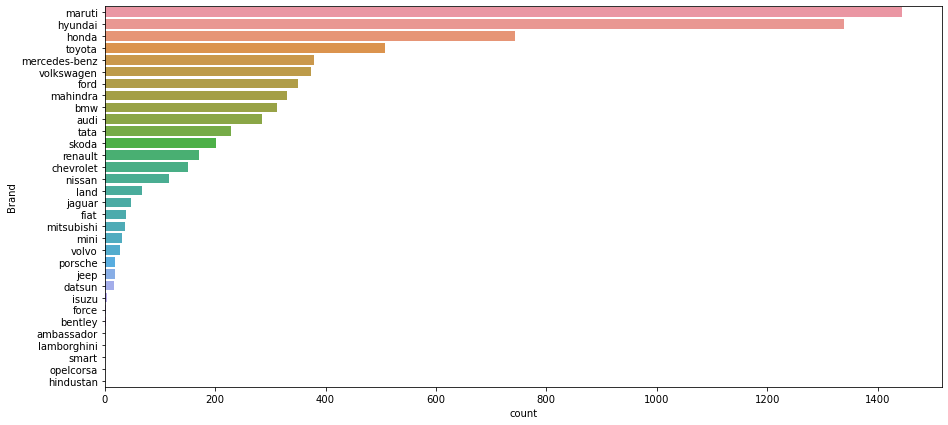

<IPython.core.display.Javascript object>

In [16]:
plt.figure(figsize=(15, 7))
sns.countplot(y="Brand", data=df, order=df["Brand"].value_counts().index)

#### 2. Car Model Name

In [17]:
# Extract Model Names
df["Model"] = df["Name"].apply(lambda x: x.split(" ")[1].lower())

# Check the data
df["Model"].value_counts()

swift       418
city        318
i20         303
innova      203
verna       200
           ... 
land          1
tiguan        1
platinum      1
petra         1
montero       1
Name: Model, Length: 218, dtype: int64

<IPython.core.display.Javascript object>

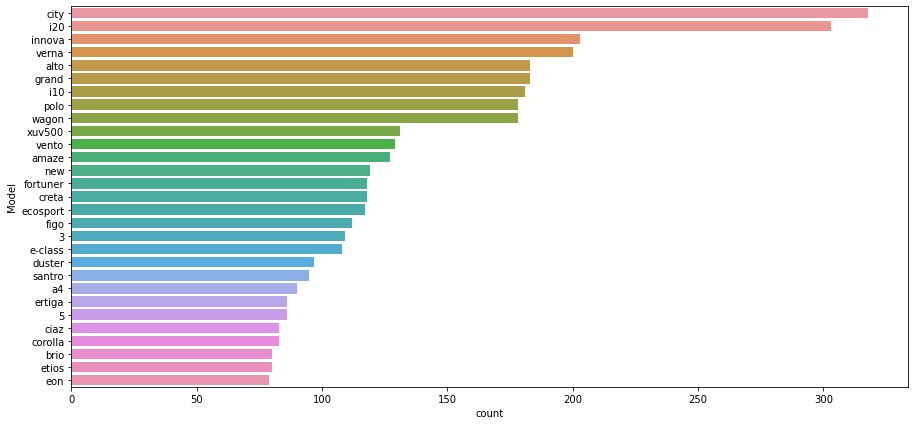

<IPython.core.display.Javascript object>

In [18]:
plt.figure(figsize=(15, 7))
sns.countplot(y="Model", data=df, order=df["Model"].value_counts().index[1:30])

It is clear from the above charts that out dataset contains used cars from luxury as well as budget friendly brands.

We can create a new variable using this information. We will bin all our cars in 3 categories -

1. Budget Friendly
2. Mid Range
3. Luxury Cars

#### 3. Car_category

In [19]:
df.groupby(["Brand"])["Price"].mean().sort_values(ascending=False)

Brand
lamborghini      120.000000
bentley           59.000000
porsche           48.348333
land              39.259500
jaguar            37.632250
mini              26.896923
mercedes-benz     26.809874
audi              25.537712
bmw               25.243146
volvo             18.802857
jeep              18.718667
isuzu             14.696667
toyota            11.580024
mitsubishi        11.058889
force              9.333333
mahindra           8.045919
skoda              7.559075
ford               6.889400
renault            5.799034
honda              5.411743
hyundai            5.343433
volkswagen         5.307270
nissan             4.738352
maruti             4.517267
tata               3.562849
fiat               3.269286
datsun             3.049231
chevrolet          3.044463
smart              3.000000
ambassador         1.350000
hindustan               NaN
opelcorsa               NaN
Name: Price, dtype: float64

<IPython.core.display.Javascript object>

The output is very close to our expectation (domain knowledge), in terms of brand ordering. Mean price of a used Lamborghini is 120 Lakhs and that of cars from other luxury brands follow in a descending order.

Towards the bottom end we have the more budget friendly brands.

We can see that there is some missingness in our data. Let us come back to creating this variable once we have removed missingness from the data.

# Exploratory Data Analysis

In [20]:
# Basic summary stats - Numeric variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
S.No.,7253.0,3626.000000,2093.905084,0.00,1813.000,3626.00,5439.0000,7252.00
Year,7253.0,2013.365366,3.254421,1996.00,2011.000,2014.00,2016.0000,2019.00
Kilometers_Driven,7253.0,58699.063146,84427.720583,171.00,34000.000,53416.00,73000.0000,6500000.00
Seats,7200.0,5.279722,0.811660,0.00,5.000,5.00,5.0000,10.00
Price,6019.0,9.479468,11.187917,0.44,3.500,5.64,9.9500,160.00
km_per_unit_fuel,7251.0,18.141580,4.562197,0.00,15.170,18.16,21.1000,33.54
engine_num,7207.0,1616.573470,595.285137,72.00,1198.000,1493.00,1968.0000,5998.00
power_num,7078.0,112.765214,53.493553,34.20,75.000,94.00,138.1000,616.00
new_price_num,1006.0,22.779692,27.759344,3.91,7.885,11.57,26.0425,375.00


<IPython.core.display.Javascript object>

**Observations**
1. S.No. clearly has no interpretation here but as discussed earlier let us drop it only after having looked at the initial linear model.
2. Kilometers_Driven values have an incredibly high range. We should check a few of the extreme values to get a sense of the data.
3. Minimum and maximum number of seats in the car also warrent a quick check. On an average a car seems to have 5 seats, which is about right.
4. We have used cars being sold at less than a lakh rupees and as high as 160 lakh, as we saw for Lamborghini earlier. We might have to drop some of these outliers to build a robust model.
5. Min Mileage being 0 is also concerning, we'll have to check what is going on.
6. Engine and Power mean and median values are not very different. Only someone with more domain knowledge would be able to comment furthur on these attributes.
7. New price range seems right. We have both budget friendly Maruti cars and Lamborghinis in our stock. Mean being twice that of the median suggests that there are only a few very high range brands, which again makes sense.

In [21]:
# Check Kilometers_Driven extreme values
df.sort_values(by=["Kilometers_Driven"], ascending=False).head(10)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,km_per_unit_fuel,mileage_unit,engine_num,power_num,new_price_num,Brand,Model
2328,2328,BMW X5 xDrive 30d M Sport,Chennai,2017,6500000,Diesel,Automatic,First,15.97 kmpl,2993 CC,258 bhp,5.0,NaN,65.00,15.97,kmpl,2993.0,258.00,NaN,bmw,x5
340,340,Skoda Octavia Ambition Plus 2.0 TDI AT,Kolkata,2013,775000,Diesel,Automatic,First,19.3 kmpl,1968 CC,141 bhp,5.0,NaN,7.50,19.30,kmpl,1968.0,141.00,NaN,skoda,octavia
1860,1860,Volkswagen Vento Diesel Highline,Chennai,2013,720000,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,5.90,20.54,kmpl,1598.0,103.60,NaN,volkswagen,vento
358,358,Hyundai i10 Magna 1.2,Chennai,2009,620000,Petrol,Manual,First,20.36 kmpl,1197 CC,78.9 bhp,5.0,NaN,2.70,20.36,kmpl,1197.0,78.90,NaN,hyundai,i10
2823,2823,Volkswagen Jetta 2013-2015 2.0L TDI Highline AT,Chennai,2015,480000,Diesel,Automatic,First,16.96 kmpl,1968 CC,138.03 bhp,5.0,NaN,13.00,16.96,kmpl,1968.0,138.03,NaN,volkswagen,jetta
3092,3092,Honda City i VTEC SV,Kolkata,2015,480000,Petrol,Manual,First,17.4 kmpl,1497 CC,117.3 bhp,5.0,NaN,5.00,17.40,kmpl,1497.0,117.30,NaN,honda,city
4491,4491,Hyundai i20 Magna Optional 1.2,Bangalore,2013,445000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.9 bhp,5.0,NaN,4.45,18.50,kmpl,1197.0,82.90,NaN,hyundai,i20
6921,6921,Maruti Swift Dzire Tour LDI,Jaipur,2012,350000,Diesel,Manual,First,23.4 kmpl,1248 CC,74 bhp,5.0,NaN,NaN,23.40,kmpl,1248.0,74.00,NaN,maruti,swift
3649,3649,Tata Indigo LS,Jaipur,2008,300000,Diesel,Manual,First,17.0 kmpl,1405 CC,70 bhp,5.0,NaN,1.00,17.00,kmpl,1405.0,70.00,NaN,tata,indigo
1528,1528,Toyota Innova 2.5 G (Diesel) 8 Seater BS IV,Hyderabad,2005,299322,Diesel,Manual,First,12.8 kmpl,2494 CC,102 bhp,8.0,NaN,4.00,12.80,kmpl,2494.0,102.00,NaN,toyota,innova


<IPython.core.display.Javascript object>

It looks like the first row here is a data entry error. A car manufactured as recently as 2017 having been driven 6500000 kms is almost impossible.

The other observations that follow are also on a higher end. There is a good chance that these are outliers. We'll look at this furthur while doing the univariate analysis.

In [22]:
# Check Kilometers_Driven Extreme values
df.sort_values(by=["Kilometers_Driven"], ascending=True).head(10)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,km_per_unit_fuel,mileage_unit,engine_num,power_num,new_price_num,Brand,Model
1361,1361,Maruti Alto 800 2016-2019 VXI,Mumbai,2019,171,Petrol,Manual,First,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN,3.60,24.70,kmpl,796.0,47.30,NaN,maruti,alto
5606,5606,Maruti Wagon R ZXI AMT 1.2,Mumbai,2019,600,Petrol,Automatic,First,21.5 kmpl,1197 CC,81.80 bhp,5.0,6.8 Lakh,6.25,21.50,kmpl,1197.0,81.80,6.80,maruti,wagon
1198,1198,Volkswagen Polo 1.0 MPI Trendline,Hyderabad,2019,1000,Petrol,Manual,First,18.78 kmpl,999 CC,75 bhp,5.0,6.74 Lakh,5.68,18.78,kmpl,999.0,75.00,6.74,volkswagen,polo
5941,5941,Renault KWID RXL,Pune,2018,1000,Petrol,Manual,First,25.17 kmpl,799 CC,53.3 bhp,5.0,4.45 Lakh,3.40,25.17,kmpl,799.0,53.30,4.45,renault,kwid
6201,6201,Maruti Alto LXI,Kolkata,2019,1000,Petrol,Manual,First,24.7 kmpl,796 CC,47.3 bhp,5.0,3.99 Lakh,NaN,24.70,kmpl,796.0,47.30,3.99,maruti,alto
1161,1161,Tata Tigor 1.2 Revotron XTA,Ahmedabad,2018,1000,Petrol,Automatic,First,20.3 kmpl,1199 CC,84 bhp,5.0,NaN,6.85,20.30,kmpl,1199.0,84.00,NaN,tata,tigor
1598,1598,Tata Xenon XT EX 4X2,Jaipur,2017,1000,Diesel,Manual,First,13.49 kmpl,2179 CC,138.03 bhp,5.0,NaN,7.50,13.49,kmpl,2179.0,138.03,NaN,tata,xenon
173,173,Hyundai Grand i10 1.2 Kappa Asta,Kolkata,2019,1000,Petrol,Manual,First,18.9 kmpl,1197 CC,81.86 bhp,5.0,7.39 Lakh,6.50,18.90,kmpl,1197.0,81.86,7.39,hyundai,grand
1242,1242,Jaguar XE 2.0L Diesel Prestige,Delhi,2018,1000,Diesel,Automatic,First,13.6 kmpl,1999 CC,177 bhp,5.0,52.77 Lakh,40.00,13.60,kmpl,1999.0,177.00,52.77,jaguar,xe
5339,5339,Hyundai i20 Active SX Dual Tone Petrol,Pune,2019,1000,Petrol,Manual,First,17.19 kmpl,1197 CC,81.86 bhp,5.0,10.25 Lakh,8.60,17.19,kmpl,1197.0,81.86,10.25,hyundai,i20


<IPython.core.display.Javascript object>

After looking at the columns - Year, New Price and Price these entries seem feasible.

1000 might be default value in this case. Quite a few cars having driven exactly 1000 km is suspicious.

In [23]:
# Check seats extreme values
df.sort_values(by=["Seats"], ascending=True).head(5)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,km_per_unit_fuel,mileage_unit,engine_num,power_num,new_price_num,Brand,Model
3999,3999,Audi A4 3.2 FSI Tiptronic Quattro,Hyderabad,2012,125000,Petrol,Automatic,First,10.5 kmpl,3197 CC,null bhp,0.0,NaN,18.00,10.5,kmpl,3197.0,NaN,NaN,audi,a4
693,693,Mercedes-Benz SLK-Class SLK 350,Coimbatore,2016,22732,Petrol,Automatic,First,18.1 kmpl,3498 CC,306 bhp,2.0,NaN,55.54,18.1,kmpl,3498.0,306.0,NaN,mercedes-benz,slk-class
798,798,Mercedes-Benz SLK-Class SLK 350,Bangalore,2015,10000,Petrol,Automatic,First,18.1 kmpl,3498 CC,306 bhp,2.0,NaN,55.00,18.1,kmpl,3498.0,306.0,NaN,mercedes-benz,slk-class
5781,5781,Lamborghini Gallardo Coupe,Delhi,2011,6500,Petrol,Automatic,Third,6.4 kmpl,5204 CC,560 bhp,2.0,NaN,120.00,6.4,kmpl,5204.0,560.0,NaN,lamborghini,gallardo
4722,4722,Mercedes-Benz SL-Class SL 500,Kolkata,2010,35000,Petrol,Automatic,First,8.1 kmpl,5461 CC,387.3 bhp,2.0,NaN,29.50,8.1,kmpl,5461.0,387.3,NaN,mercedes-benz,sl-class


<IPython.core.display.Javascript object>

Audi A4 having 0 seats is clearly a data entry error. This column warrents some outlier treatment or we can treat seats == 0 as a missing value. Overall, there doesn't seem not much to be concerned about here.  

In [24]:
# Let us check if we have a similar car in our dataset.
df[df["Name"].str.startswith("Audi A4")]
# Looks like an Audi A4 typically has 5 seats.

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,km_per_unit_fuel,mileage_unit,engine_num,power_num,new_price_num,Brand,Model
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,15.20,kmpl,1968.0,140.80,NaN,audi,a4
50,50,Audi A4 2.0 TDI 177 Bhp Premium Plus,Kochi,2015,13648,Diesel,Automatic,First,17.11 kmpl,1968 CC,174.33 bhp,5.0,NaN,21.43,17.11,kmpl,1968.0,174.33,NaN,audi,a4
65,65,Audi A4 2.0 TDI Multitronic,Jaipur,2012,65664,Diesel,Automatic,First,16.55 kmpl,1968 CC,140 bhp,5.0,NaN,13.50,16.55,kmpl,1968.0,140.00,NaN,audi,a4
103,103,Audi A4 3.0 TDI Quattro Premium,Kolkata,2010,30000,Diesel,Automatic,First,14.94 kmpl,2967 CC,241.4 bhp,5.0,NaN,9.80,14.94,kmpl,2967.0,241.40,NaN,audi,a4
150,150,Audi A4 2.0 TDI 177 Bhp Premium Plus,Coimbatore,2015,48214,Diesel,Automatic,First,17.11 kmpl,1968 CC,174.33 bhp,5.0,NaN,23.32,17.11,kmpl,1968.0,174.33,NaN,audi,a4
717,717,Audi A4 2.0 TDI 177 Bhp Premium Plus,Bangalore,2013,45979,Diesel,Automatic,Second,17.11 kmpl,1968 CC,174.33 bhp,5.0,NaN,19.50,17.11,kmpl,1968.0,174.33,NaN,audi,a4
853,853,Audi A4 2.0 TDI,Delhi,2011,46000,Diesel,Automatic,Second,16.55 kmpl,1968 CC,147.51 bhp,5.0,NaN,10.99,16.55,kmpl,1968.0,147.51,NaN,audi,a4
854,854,Audi A4 2.0 TDI,Kolkata,2012,47346,Diesel,Automatic,First,16.55 kmpl,1968 CC,147.51 bhp,5.0,NaN,14.50,16.55,kmpl,1968.0,147.51,NaN,audi,a4
874,874,Audi A4 2.0 TDI Multitronic,Ahmedabad,2011,59000,Diesel,Automatic,First,16.55 kmpl,1968 CC,140 bhp,5.0,NaN,12.50,16.55,kmpl,1968.0,140.00,NaN,audi,a4
964,964,Audi A4 2.0 TDI,Kolkata,2009,34000,Diesel,Automatic,First,16.55 kmpl,1968 CC,147.51 bhp,5.0,NaN,9.95,16.55,kmpl,1968.0,147.51,NaN,audi,a4


<IPython.core.display.Javascript object>

In [25]:
# Let us replace #seats in row index 3999 form 0 to 5
df.loc[3999, "Seats"] = 5.0

<IPython.core.display.Javascript object>

In [26]:
# Check seats extreme values
df.sort_values(by=["Seats"], ascending=False).head(5)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,km_per_unit_fuel,mileage_unit,engine_num,power_num,new_price_num,Brand,Model
2575,2575,Chevrolet Tavera LS B3 10 Seats BSIII,Hyderabad,2015,120000,Diesel,Manual,First,14.8 kmpl,2499 CC,80 bhp,10.0,NaN,5.50,14.8,kmpl,2499.0,80.0,NaN,chevrolet,tavera
1907,1907,Toyota Qualis FS B3,Bangalore,2002,63000,Diesel,Manual,Third,13.1 kmpl,2446 CC,75 bhp,10.0,NaN,3.65,13.1,kmpl,2446.0,75.0,NaN,toyota,qualis
6288,6288,Chevrolet Tavera LS B3 10 Seats BSIII,Hyderabad,2005,150000,Diesel,Manual,Second,14.8 kmpl,2499 CC,80 bhp,10.0,NaN,NaN,14.8,kmpl,2499.0,80.0,NaN,chevrolet,tavera
6242,6242,Tata Sumo EX 10/7 Str BSII,Chennai,2015,196000,Diesel,Manual,Second,12.2 kmpl,1948 CC,68 bhp,10.0,NaN,NaN,12.2,kmpl,1948.0,68.0,NaN,tata,sumo
814,814,Toyota Qualis FS B2,Pune,2004,77757,Diesel,Manual,Second,13.1 kmpl,2446 CC,75 bhp,10.0,NaN,3.50,13.1,kmpl,2446.0,75.0,NaN,toyota,qualis


<IPython.core.display.Javascript object>

Of course, a Toyota Qualis has 10 seats and so does a Tata Sumo. We don't see any data entry error here.

In [27]:
# Check Mileage - km_per_unit_fuel extreme values
df.sort_values(by=["km_per_unit_fuel"], ascending=True).head(10)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,km_per_unit_fuel,mileage_unit,engine_num,power_num,new_price_num,Brand,Model
2597,2597,Hyundai Santro Xing XP,Pune,2007,70000,Petrol,Manual,First,0.0 kmpl,1086 CC,null bhp,5.0,NaN,1.12,0.0,kmpl,1086.0,NaN,NaN,hyundai,santro
2343,2343,Hyundai Santro AT,Hyderabad,2006,74483,Petrol,Automatic,First,0.0 kmpl,999 CC,null bhp,5.0,NaN,2.30,0.0,kmpl,999.0,NaN,NaN,hyundai,santro
5270,5270,Honda City 1.5 GXI,Bangalore,2002,53000,Petrol,Manual,Second,0.0 kmpl,NaN,NaN,NaN,NaN,1.85,0.0,kmpl,NaN,NaN,NaN,honda,city
424,424,Volkswagen Jetta 2007-2011 1.9 L TDI,Hyderabad,2010,42021,Diesel,Manual,First,0.0 kmpl,1968 CC,null bhp,5.0,NaN,5.45,0.0,kmpl,1968.0,NaN,NaN,volkswagen,jetta
6857,6857,Land Rover Freelander 2 TD4 SE,Mumbai,2011,87000,Diesel,Automatic,First,0.0 kmpl,2179 CC,115 bhp,5.0,NaN,NaN,0.0,kmpl,2179.0,115.0,NaN,land,rover
443,443,Hyundai Santro GLS I - Euro I,Coimbatore,2012,50243,Petrol,Manual,First,0.0 kmpl,1086 CC,null bhp,5.0,NaN,3.35,0.0,kmpl,1086.0,NaN,NaN,hyundai,santro
5119,5119,Hyundai Santro Xing XP,Kolkata,2008,45500,Petrol,Manual,Second,0.0 kmpl,1086 CC,null bhp,5.0,NaN,1.17,0.0,kmpl,1086.0,NaN,NaN,hyundai,santro
5022,5022,Land Rover Freelander 2 TD4 SE,Hyderabad,2013,46000,Diesel,Automatic,Second,0.0 kmpl,2179 CC,115 bhp,5.0,NaN,26.00,0.0,kmpl,2179.0,115.0,NaN,land,rover
5016,5016,Land Rover Freelander 2 TD4 HSE,Delhi,2013,72000,Diesel,Automatic,First,0.0 kmpl,2179 CC,115 bhp,5.0,NaN,15.50,0.0,kmpl,2179.0,115.0,NaN,land,rover
2542,2542,Hyundai Santro GLS II - Euro II,Bangalore,2011,65000,Petrol,Manual,Second,0.0 kmpl,NaN,NaN,NaN,NaN,3.15,0.0,kmpl,NaN,NaN,NaN,hyundai,santro


<IPython.core.display.Javascript object>

We will have to treat Mileage = 0 as missing values

In [28]:
# Check Mileage - km_per_unit_fuel extreme values
df.sort_values(by=["km_per_unit_fuel"], ascending=False).head(10)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,km_per_unit_fuel,mileage_unit,engine_num,power_num,new_price_num,Brand,Model
1332,1332,Maruti Wagon R CNG LXI,Pune,2013,79494,CNG,Manual,First,33.54 km/kg,998 CC,67.04 bhp,5.0,5.54 Lakh,2.96,33.54,km/kg,998.0,67.04,5.54,maruti,wagon
2059,2059,Maruti Wagon R CNG LXI,Mumbai,2013,54000,CNG,Manual,First,33.54 km/kg,998 CC,67.04 bhp,5.0,5.58 Lakh,3.05,33.54,km/kg,998.0,67.04,5.58,maruti,wagon
2371,2371,Maruti Wagon R CNG LXI,Pune,2014,29202,CNG,Manual,First,33.54 km/kg,998 CC,67.04 bhp,5.0,5.54 Lakh,3.90,33.54,km/kg,998.0,67.04,5.54,maruti,wagon
3129,3129,Maruti Wagon R CNG LXI,Delhi,2014,74663,CNG,Manual,First,33.54 km/kg,998 CC,67.04 bhp,5.0,5.35 Lakh,3.25,33.54,km/kg,998.0,67.04,5.35,maruti,wagon
4141,4141,Maruti Wagon R CNG LXI,Mumbai,2014,47200,CNG,Manual,First,33.54 km/kg,998 CC,67.04 bhp,5.0,5.58 Lakh,2.85,33.54,km/kg,998.0,67.04,5.58,maruti,wagon
3869,3869,Maruti Alto 800 2016-2019 CNG LXI,Delhi,2012,65537,CNG,Manual,Second,33.44 km/kg,796 CC,40.3 bhp,4.0,NaN,2.10,33.44,km/kg,796.0,40.30,NaN,maruti,alto
1269,1269,Maruti Alto 800 2016-2019 CNG LXI,Mumbai,2018,10600,CNG,Manual,First,33.44 km/kg,796 CC,40.3 bhp,4.0,NaN,3.50,33.44,km/kg,796.0,40.30,NaN,maruti,alto
3553,3553,Maruti Alto 800 2016-2019 CNG LXI,Pune,2015,18000,CNG,Manual,First,33.44 km/kg,796 CC,40.3 bhp,4.0,NaN,3.00,33.44,km/kg,796.0,40.30,NaN,maruti,alto
4769,4769,Maruti Alto 800 2016-2019 CNG LXI,Kochi,2017,24310,CNG,Manual,First,33.44 km/kg,796 CC,40.3 bhp,4.0,NaN,3.70,33.44,km/kg,796.0,40.30,NaN,maruti,alto
6019,6019,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN,NaN,32.26,km/kg,998.0,58.20,NaN,maruti,alto


<IPython.core.display.Javascript object>

Maruti Wagon R and Maruti Alto CNG versions are budget friendly cars with high mileage so these data points are fine.

In [29]:
# looking at value counts for non-numeric features

num_to_display = 10  # defining this up here so it's easy to change later
for colname in df.dtypes[df.dtypes == "object"].index:
    val_counts = df[colname].value_counts(dropna=False)  # Will also show the NA counts
    print(val_counts[:num_to_display])
    if len(val_counts) > num_to_display:
        print(f"Only displaying first {num_to_display} of {len(val_counts)} values.")
    print("\n\n")  # just for more space in between

Mahindra XUV500 W8 2WD        55
Maruti Swift VDI              49
Maruti Swift Dzire VDI        42
Honda City 1.5 S MT           39
Maruti Swift VDI BSIV         37
Maruti Ritz VDi               35
Toyota Fortuner 3.0 Diesel    35
Hyundai Grand i10 Sportz      32
Honda Amaze S i-Dtech         32
Honda City 1.5 V MT           32
Name: Name, dtype: int64
Only displaying first 10 of 2041 values.



Mumbai        949
Hyderabad     876
Coimbatore    772
Kochi         772
Pune          765
Delhi         660
Kolkata       654
Chennai       591
Jaipur        499
Bangalore     440
Name: Location, dtype: int64
Only displaying first 10 of 11 values.



Diesel      3852
Petrol      3325
CNG           62
LPG           12
Electric       2
Name: Fuel_Type, dtype: int64



Manual       5204
Automatic    2049
Name: Transmission, dtype: int64



First             5952
Second            1152
Third              137
Fourth & Above      12
Name: Owner_Type, dtype: int64



17.0 kmpl     207
18.9 kmpl     20

<IPython.core.display.Javascript object>

Since we haven't dropped the original columns that we processed, we have a few redunadant output here.

We had checked cars of different `Fuel_Type` earlier, but we did not encounter the 2 electric cars. Let us check why.

In [30]:
df.loc[df["Fuel_Type"] == "Electric"]

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,km_per_unit_fuel,mileage_unit,engine_num,power_num,new_price_num,Brand,Model
4446,4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,NaN,72 CC,41 bhp,5.0,13.58 Lakh,13.00,NaN,NaN,72.0,41.0,13.58,mahindra,e
4904,4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798 CC,73 bhp,5.0,NaN,12.75,NaN,NaN,1798.0,73.0,NaN,toyota,prius


<IPython.core.display.Javascript object>

Mileage values for these cars are NaN, that is why we did not encounter these earlier with groupby.

Electric cars are very new in the market and very rare in our dataset. We can consider dropping these two observations if they turn out to be outliers later. There is a good chance that we will not be able to create a good price prediction model for electric cars, with the currently available data.

New Price for 6247 entries is missing. We need to explore if we can impute these or we should drop this column altogether.

## Missing Values

Before we start looking at the individual distributions and interactions, let's quickly check the missingness in the data.

In [31]:
df.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6247
Price                1234
km_per_unit_fuel        2
mileage_unit            2
engine_num             46
power_num             175
new_price_num        6247
Brand                   0
Model                   0
dtype: int64

<IPython.core.display.Javascript object>

* 2 Electric car variants don't have entries for Mileage.
* Engine displacement information of 46 observations is missing and maximum power of 175 entries is missing.
* Information about number of seats is not avaliable for 53 entries.
* New Price as we saw earlier has a huge missing count. We'll have to see if there is a pattern here.
* Price is also missing for 1234 entries. Since price is our response variable that we want to predict, we will have to drop these rows when we actually build a model. These rows will not be able to help us in modelling or model evaluation. But while we are analysing the distributions and doing missing value imputations, we will keep using information from these rows.

In [32]:
# Drop the redundant columns.
df.drop(
    columns=["Mileage", "mileage_unit", "Engine", "Power", "New_Price"], inplace=True
)

<IPython.core.display.Javascript object>

## Distributions

### Price

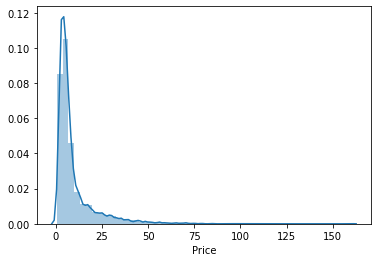

<IPython.core.display.Javascript object>

In [33]:
sns.distplot(df["Price"])

This is a highly skewed distribution. Let us use log transformation on this column to see of that helps normalise the distribution.

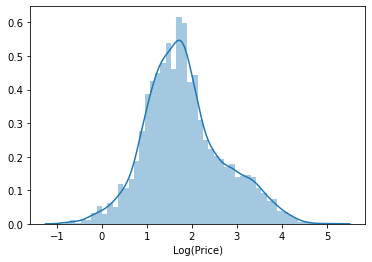

<IPython.core.display.Javascript object>

In [34]:
sns.distplot(np.log(df["Price"]), axlabel="Log(Price)")

In [35]:
# Log Transformation has definitely helped in reducing the skew
# Creating a new column with the transformed variable.
df["price_log"] = np.log(df["Price"])

<IPython.core.display.Javascript object>

### Price vs Location

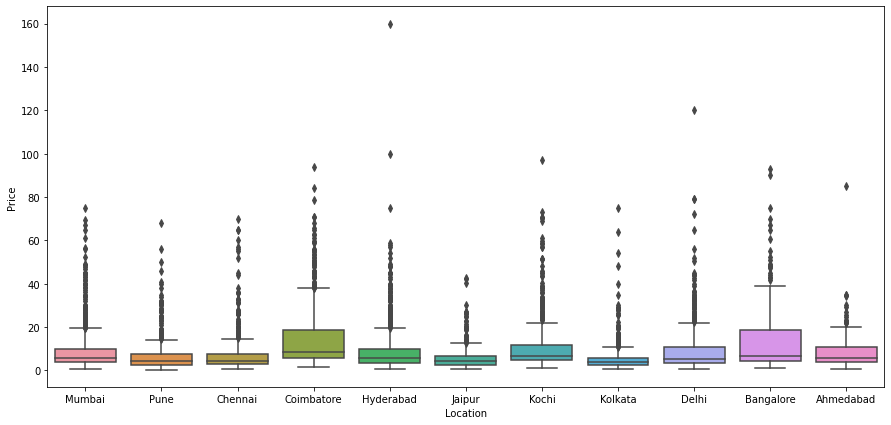

<IPython.core.display.Javascript object>

In [36]:
plt.figure(figsize=(15, 7))
sns.boxplot(x="Location", y="Price", data=df)

Price of used cars has a large IQR in Coimbatore and Bangalore

### Kilometers_Driven

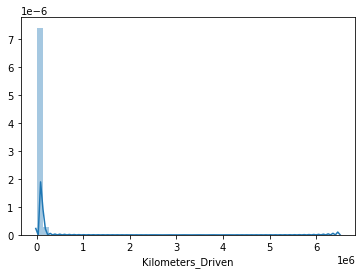

<IPython.core.display.Javascript object>

In [37]:
sns.distplot(df["Kilometers_Driven"])

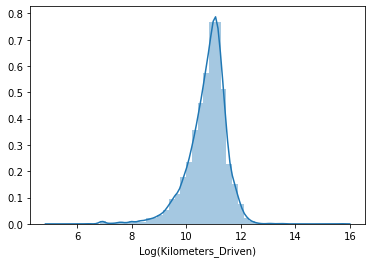

<IPython.core.display.Javascript object>

In [38]:
# Log transformation
sns.distplot(np.log(df["Kilometers_Driven"]), axlabel="Log(Kilometers_Driven)")

Transformation has reduced the extreme skewness.

In [39]:
df["kilometers_driven_log"] = np.log(df["Kilometers_Driven"])

<IPython.core.display.Javascript object>

### Bivariate Distributions

In [40]:
# sns.pairplot(df, hue="Fuel_Type")

<IPython.core.display.Javascript object>

Zooming into these plots gives us a lot of information.

* Contrary to intuition Kilometers Driven does not seem to have a relationship with price.
* Price has a positive relationship with Year. Newer the car, higher the price.
* S.No. does not capture any information that we were hoping for. The temporal element of variation is captured in the year column.
* 2 seater cars are all luxury variants. Cars with 8-10 seats are exclusively mid to high range.
* Mileage does not seem to show much relationship with the price of used cars.
* Engine displacement and Power of the car have a positive relationship with the price.
* New Price and Used Car Price are also positively correlated, which is expected.
* Kilometers Driven has a peculiar relationship with the Year variable. Generally, newer the car lesser the distance it has travelled, but this is not always true.
* CNG cars are conspicuous outliers when it comes to Mileage. The mileage of these cars is very high.
* Mileage and power of newer cars is increasing owing to advancement in technology.
* Mileage has a negative correlation with engine displacement and power. More powerful the engine, more fuel it consumes in general.

### Correlation between numeric Variables

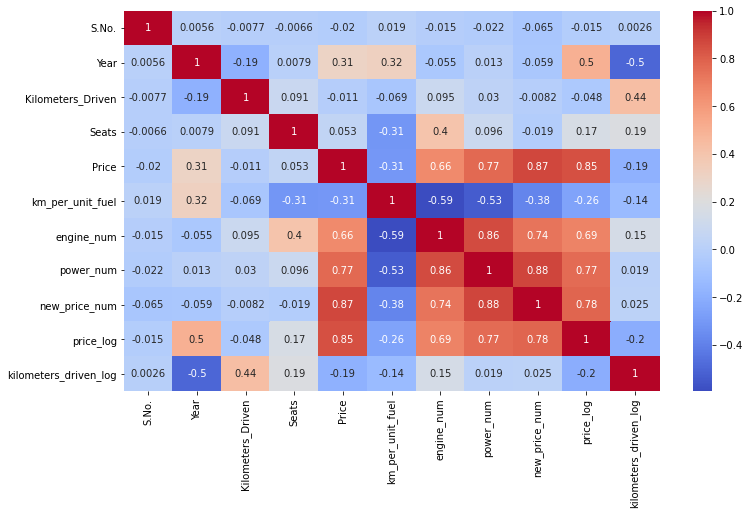

<IPython.core.display.Javascript object>

In [41]:
plt.figure(figsize=(12, 7))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")

* Power and engine are important predictors of price
* We will have to work on imputing New Price missing values because this is a very important feature in predicting used car price accurately 

## Missing Value Treatment

In [42]:
# Missingness check once again
df.isnull().sum()

S.No.                       0
Name                        0
Location                    0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Seats                      53
Price                    1234
km_per_unit_fuel            2
engine_num                 46
power_num                 175
new_price_num            6247
Brand                       0
Model                       0
price_log                1234
kilometers_driven_log       0
dtype: int64

<IPython.core.display.Javascript object>

### Seats

In [43]:
# Look at a few rows where #seats is missing
df[df["Seats"].isnull()]

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,km_per_unit_fuel,engine_num,power_num,new_price_num,Brand,Model,price_log,kilometers_driven_log
194,194,Honda City 1.5 GXI,Ahmedabad,2007,60006,Petrol,Manual,First,NaN,2.95,0.00,NaN,NaN,NaN,honda,city,1.081805,11.002200
208,208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,NaN,2.11,16.10,NaN,NaN,NaN,maruti,swift,0.746688,10.645449
229,229,Ford Figo Diesel,Bangalore,2015,70436,Diesel,Manual,First,NaN,3.60,0.00,1498.0,99.0,NaN,ford,figo,1.280934,11.162460
733,733,Maruti Swift 1.3 VXi,Chennai,2006,97800,Petrol,Manual,Third,NaN,1.75,16.10,NaN,NaN,NaN,maruti,swift,0.559616,11.490680
749,749,Land Rover Range Rover 3.0 D,Mumbai,2008,55001,Diesel,Automatic,Second,NaN,26.50,0.00,NaN,NaN,NaN,land,rover,3.277145,10.915107
1294,1294,Honda City 1.3 DX,Delhi,2009,55005,Petrol,Manual,First,NaN,3.20,12.80,NaN,NaN,NaN,honda,city,1.163151,10.915179
1327,1327,Maruti Swift 1.3 ZXI,Hyderabad,2015,50295,Petrol,Manual,First,NaN,5.80,16.10,NaN,NaN,NaN,maruti,swift,1.757858,10.825661
1385,1385,Honda City 1.5 GXI,Pune,2004,115000,Petrol,Manual,Second,NaN,1.50,0.00,NaN,NaN,NaN,honda,city,0.405465,11.652687
1460,1460,Land Rover Range Rover Sport 2005 2012 Sport,Coimbatore,2008,69078,Petrol,Manual,First,NaN,40.88,0.00,NaN,NaN,NaN,land,rover,3.710641,11.142992
1917,1917,Honda City 1.5 EXI,Jaipur,2005,88000,Petrol,Manual,Second,NaN,1.70,13.00,1493.0,100.0,NaN,honda,city,0.530628,11.385092


<IPython.core.display.Javascript object>

In [44]:
# We'll impute these missing values one by one, by taking median number of seats for the particular car,
# using the Brand and Model name
df.groupby(["Brand", "Model"], as_index=False)["Seats"].median()

,Brand,Model,Seats
0,ambassador,classic,5.0
1,audi,a3,5.0
2,audi,a4,5.0
3,audi,a6,5.0
4,audi,a7,5.0
...,...,...,...
217,volvo,s60,5.0
218,volvo,s80,5.0
219,volvo,v40,5.0
220,volvo,xc60,5.0


<IPython.core.display.Javascript object>

In [45]:
# Impute missing Seats
df["Seats"] = df.groupby(["Brand", "Model"])["Seats"].transform(
    lambda x: x.fillna(x.median())
)

<IPython.core.display.Javascript object>

In [46]:
# Check 'Seats'
df[df["Seats"].isnull()]

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,km_per_unit_fuel,engine_num,power_num,new_price_num,Brand,Model,price_log,kilometers_driven_log
2369,2369,Maruti Estilo LXI,Chennai,2008,56000,Petrol,Manual,Second,NaN,1.50,19.5,1061.0,NaN,NaN,maruti,estilo,0.405465,10.933107
3882,3882,Maruti Estilo LXI,Kolkata,2010,40000,Petrol,Manual,Second,NaN,2.50,19.5,1061.0,NaN,NaN,maruti,estilo,0.916291,10.596635
5893,5893,Maruti Estilo LXI,Chennai,2008,51000,Petrol,Manual,Second,NaN,1.75,19.5,1061.0,NaN,NaN,maruti,estilo,0.559616,10.839581


<IPython.core.display.Javascript object>

In [47]:
# Maruti Estilo can accomodate 5
df["Seats"] = df["Seats"].fillna(5.0)

<IPython.core.display.Javascript object>

In [48]:
# We will use similar methods to fill missing values for engine, power and new price
df["engine_num"] = df.groupby(["Brand", "Model"])["engine_num"].transform(
    lambda x: x.fillna(x.median())
)
df["power_num"] = df.groupby(["Brand", "Model"])["power_num"].transform(
    lambda x: x.fillna(x.median())
)
df["new_price_num"] = df.groupby(["Brand", "Model"])["new_price_num"].transform(
    lambda x: x.fillna(x.median())
)

<IPython.core.display.Javascript object>

In [49]:
df.isnull().sum()

S.No.                       0
Name                        0
Location                    0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Seats                       0
Price                    1234
km_per_unit_fuel            2
engine_num                  0
power_num                  12
new_price_num            1512
Brand                       0
Model                       0
price_log                1234
kilometers_driven_log       0
dtype: int64

<IPython.core.display.Javascript object>

In [50]:
# There are still some NAs in power and new_price_num.
# There are a few car brands and models in our dataset that do not contain the new price information at all.
# Now we'll have to estimate the new price using the other features.
# KNN imputation is once of the imputation methods that can be used for this.
# This sklearn method requires us to encode categorical variables, if we are using them for imputation.
# In this case we'll use only a select numeric features for imputation

from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=3, weights="uniform")  # 3 Nearest Neighbours
temp_df_for_imputation = df[
    ["engine_num", "power_num", "Year", "km_per_unit_fuel", "new_price_num", "Seats"]
]
temp_df_for_imputation = imputer.fit_transform(temp_df_for_imputation)
temp_df_for_imputation = pd.DataFrame(
    temp_df_for_imputation,
    columns=[
        "engine_num",
        "power_num",
        "Year",
        "km_per_unit_fuel",
        "new_price_num",
        "Seats",
    ],
)

# Add imputed columns to the original dataset
df["new_price_num"] = temp_df_for_imputation["new_price_num"]
df["power_num"] = temp_df_for_imputation["power_num"]
df["km_per_unit_fuel"] = temp_df_for_imputation["km_per_unit_fuel"]

<IPython.core.display.Javascript object>

In [51]:
df.isnull().sum()

S.No.                       0
Name                        0
Location                    0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Seats                       0
Price                    1234
km_per_unit_fuel            0
engine_num                  0
power_num                   0
new_price_num               0
Brand                       0
Model                       0
price_log                1234
kilometers_driven_log       0
dtype: int64

<IPython.core.display.Javascript object>

In [52]:
# Drop the redundant columns.
df.drop(columns=["Kilometers_Driven", "Name", "S.No."], inplace=True)

# Drop the rows where 'Price' == NaN and proceed to modelling
df = df[df["Price"].notna()]

<IPython.core.display.Javascript object>

# Linear Model Building

1. What we want to predict is the "Price". We will use the normalised version 'price_log' for modelling.
2. Before we proceed to modelling, we'll have to encode categorical features. We will drop categorical features like - Name 
3. We'll split the data into train and test, to be able to evaluate the model that we build on the train data.
4. Build a Linear Regression model using the train data.
5. Verify linear regression assumptions.
6. Evaluate the model performance

### Define dependent variable

In [53]:
ind_vars = df.drop(["Price", "price_log"], axis=1)
dep_var = df[["price_log", "Price"]]

<IPython.core.display.Javascript object>

### Creating dummy variables

In [54]:
def encode_cat_vars(x):
    x = pd.get_dummies(
        x,
        columns=x.select_dtypes(include=["object", "category"]).columns.tolist(),
        drop_first=True,
    )
    return x


ind_vars_num = encode_cat_vars(ind_vars)
ind_vars_num.head()

,Year,Seats,km_per_unit_fuel,engine_num,power_num,new_price_num,kilometers_driven_log,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Brand_audi,Brand_bentley,Brand_bmw,Brand_chevrolet,Brand_datsun,Brand_fiat,Brand_force,Brand_ford,Brand_honda,Brand_hyundai,Brand_isuzu,Brand_jaguar,Brand_jeep,Brand_lamborghini,Brand_land,Brand_mahindra,Brand_maruti,Brand_mercedes-benz,Brand_mini,Brand_mitsubishi,Brand_nissan,Brand_porsche,Brand_renault,Brand_skoda,Brand_smart,Brand_tata,Brand_toyota,Brand_volkswagen,Brand_volvo,Model_1000,Model_3,Model_5,Model_6,Model_7,Model_800,Model_a,Model_a-star,Model_a3,Model_a4,Model_a6,Model_a7,Model_a8,Model_accent,Model_accord,Model_alto,Model_amaze,Model_ameo,Model_aspire,Model_aveo,Model_avventura,Model_b,Model_baleno,Model_beat,Model_beetle,Model_bolero,Model_bolt,Model_boxster,Model_br-v,Model_brio,Model_brv,Model_c-class,Model_camry,Model_captiva,Model_captur,Model_cayenne,Model_cayman,Model_cedia,Model_celerio,Model_ciaz,Model_city,Model_civic,Model_cla,Model_classic,Model_cls-class,Model_clubman,Model_compass,Model_continental,Model_cooper,Model_corolla,Model_countryman,Model_cr-v,Model_creta,Model_crosspolo,Model_cruze,Model_d-max,Model_duster,Model_dzire,Model_e,Model_e-class,Model_ecosport,Model_eeco,Model_elantra,Model_elite,Model_endeavour,Model_enjoy,Model_eon,Model_ertiga,Model_esteem,Model_estilo,Model_etios,Model_evalia,Model_f,Model_fabia,Model_fiesta,Model_figo,Model_fluence,Model_fortuner,Model_fortwo,Model_freestyle,Model_fusion,Model_gallardo,Model_getz,Model_gl-class,Model_gla,Model_glc,Model_gle,Model_gls,Model_go,Model_grand,Model_grande,Model_hexa,Model_i10,Model_i20,Model_ignis,Model_ikon,Model_indica,Model_indigo,Model_innova,Model_jazz,Model_jeep,Model_jetta,Model_koleos,Model_kuv,Model_kwid,Model_lancer,Model_laura,Model_linea,Model_lodgy,Model_logan,Model_m-class,Model_manza,Model_micra,Model_mobilio,Model_montero,Model_mustang,Model_mux,Model_nano,Model_new,Model_nexon,Model_nuvosport,Model_octavia,Model_omni,Model_one,Model_optra,Model_outlander,Model_pajero,Model_panamera,Model_passat,Model_petra,Model_platinum,Model_polo,Model_prius,Model_pulse,Model_punto,Model_q3,Model_q5,Model_q7,Model_qualis,Model_quanto,Model_r-class,Model_rapid,Model_redi,Model_redi-go,Model_renault,Model_ritz,Model_rover,Model_rs5,Model_s,Model_s-class,Model_s-cross,Model_s60,Model_s80,Model_safari,Model_sail,Model_santa,Model_santro,Model_scala,Model_scorpio,Model_siena,Model_sl-class,Model_slc,Model_slk-class,Model_sonata,Model_spark,Model_ssangyong,Model_sumo,Model_sunny,Model_superb,Model_swift,Model_sx4,Model_tavera,Model_teana,Model_terrano,Model_thar,Model_tiago,Model_tigor,Model_tiguan,Model_tt,Model_tucson,Model_tuv,Model_v40,Model_vento,Model_venture,Model_verito,Model_verna,Model_versa,Model_vitara,Model_wagon,Model_wr-v,Model_wrv,Model_x-trail,Model_x1,Model_x3,Model_x5,Model_x6,Model_xc60,Model_xc90,Model_xcent,Model_xe,Model_xenon,Model_xf,Model_xj,Model_xuv300,Model_xuv500,Model_xylo,Model_yeti,Model_z4,Model_zen,Model_zest
0,2010,5.0,26.60,998.0,58.16,5.51,11.184421,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2015,5.0,19.67,1582.0,126.20,16.06,10.621327,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

<IPython.core.display.Javascript object>

### Split the data into train and test

In [55]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    ind_vars_num, dep_var, test_size=0.3, random_state=1
)

<IPython.core.display.Javascript object>

In [56]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in train data =", x_test.shape[0])

Number of rows in train data = 4213
Number of rows in train data = 1806


<IPython.core.display.Javascript object>

### Fitting a linear model

In [57]:
import statsmodels.api as sm

# Statsmodel api does not add a constant by default. We need to add it explicitly.
x_train = sm.add_constant(x_train)
# Add constant to test data
x_test = sm.add_constant(x_test)


def build_ols_model(train):
    # Create the model
    olsmodel = sm.OLS(y_train["price_log"], train)
    return olsmodel.fit()


olsmodel1 = build_ols_model(x_train)
print(olsmodel1.summary())

                            OLS Regression Results                            
Dep. Variable:              price_log   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     407.4
Date:                Fri, 20 Nov 2020   Prob (F-statistic):               0.00
Time:                        18:47:28   Log-Likelihood:                 1347.6
No. Observations:                4213   AIC:                            -2231.
Df Residuals:                    3981   BIC:                            -758.9
Df Model:                         231                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:1362: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


<IPython.core.display.Javascript object>

* Both the R-squared and Adjusted R squared of our model are very high. This is a clear indication that we have been able to create a very good model that is able to explain variance in price of used cars for upto 95% 
* The model is not an underfitting model.
* To be able to make statistical inferences from our model, we will have to test that the linear regression assumptions are followed.
* Before we move on to assumption testing, we'll do a quick performance check on the test data.

In [58]:
import math

# RMSE
def rmse(predictions, targets):
    return np.sqrt(((targets - predictions) ** 2).mean())


# MAPE
def mape(predictions, targets):
    return np.mean(np.abs((targets - predictions)) / targets) * 100


# MAE
def mae(predictions, targets):
    return np.mean(np.abs((targets - predictions)))


# Model Performance on test and train data
def model_pref(olsmodel, x_train, x_test):

    # Insample Prediction
    y_pred_train_pricelog = olsmodel.predict(x_train)
    y_pred_train_Price = y_pred_train_pricelog.apply(math.exp)
    y_train_Price = y_train["Price"]

    # Prediction on test data
    y_pred_test_pricelog = olsmodel.predict(x_test)
    y_pred_test_Price = y_pred_test_pricelog.apply(math.exp)
    y_test_Price = y_test["Price"]

    print(
        pd.DataFrame(
            {
                "Data": ["Train", "Test"],
                "RMSE": [
                    rmse(y_pred_train_Price, y_train_Price),
                    rmse(y_pred_test_Price, y_test_Price),
                ],
                "MAE": [
                    mae(y_pred_train_Price, y_train_Price),
                    mae(y_pred_test_Price, y_test_Price),
                ],
                "MAPE": [
                    mape(y_pred_train_Price, y_train_Price),
                    mape(y_pred_test_Price, y_test_Price),
                ],
            }
        )
    )


# Checking model performance
model_pref(olsmodel1, x_train, x_test)  # High Overfitting.

    Data       RMSE       MAE       MAPE
0  Train   2.871334  1.205577  12.964208
1   Test  11.163467  1.900189  14.935578


<IPython.core.display.Javascript object>

* Root Mean Squared Error of train and test data is starkly different, indicating that our model is overfitting the train data. 
* Mean Absolute Error indicates that our current model is able to predict used cars prices within mean error of 1.9 lakhs on test data.
* The units of both RMSE and MAE are same - Lakhs in this case. But RMSE is greater than MAE because it peanalises the outliers more.
* Mean Absolute Percentage Error is ~15% on the test data.

## Checking the Linear Regression Assumptions

1. No Multicollinearity
2. Mean of residuals should be 0
3. No Heteroscedasticity
4. Linearity of variables
5. Normality of error terms

### Checking Assumption 1: No Multicollinearity 

We will use VIF, to check if there is multicollinearity in the data.

Features having a VIF score >5 will be dropped/treated till all the features have a VIF score <5

In [59]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


def checking_vif(train):
    vif = pd.DataFrame()
    vif["feature"] = train.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(train.values, i) for i in range(len(train.columns))
    ]
    return vif


# print(checking_vif(x_train))

<IPython.core.display.Javascript object>

In [60]:
# There are a few variables with high VIF.
# Our current model is extreamly complex. Let us first bin the Brand and Model columns.
# This wouldn't essential reduce multicollinearity in the data, but it will help us make the dataset more managable
df.groupby(["Brand", "Model"])["new_price_num"].mean().sort_values(ascending=False)

Brand          Model      
mercedes-benz  sl-class       198.306667
bentley        continental    198.306667
mercedes-benz  s-class        171.000000
bmw            7              157.230769
               6              137.886190
                                 ...    
smart          fortwo           4.360000
maruti         800              4.360000
hyundai        eon              4.237760
datsun         redi             4.153333
               redi-go          4.153333
Name: new_price_num, Length: 215, dtype: float64

<IPython.core.display.Javascript object>

In [61]:
# We will create a new variable Car Category by binning the new_price_num
# Create a new variable - Car Category
df1 = df.copy()
df1["car_category"] = pd.cut(
    x=df["new_price_num"],
    bins=[0, 15, 30, 50, 200],
    labels=["Budget_Friendly", "Mid-Range", "Luxury_Cars", "Ultra_luxury"],
)
# car_category.value_counts()

# Drop the Brand and Model columns.
df1.drop(columns=["Brand", "Model"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [62]:
# We will have to create the x and y datasets again
ind_vars = df1.drop(["Price", "price_log"], axis=1)
dep_var = df1[["price_log", "Price"]]

# Dummy encoding
ind_vars_num = encode_cat_vars(ind_vars)

# Splitting data into train and test
x_train, x_test, y_train, y_test = train_test_split(
    ind_vars_num, dep_var, test_size=0.3, random_state=1
)

print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in train data =", x_test.shape[0], "\n\n")

# Statsmodel api does not add a constant by default. We need to add it explicitly.
x_train = sm.add_constant(x_train)
# Add constant to test data
x_test = sm.add_constant(x_test)

# Fit linear model on new dataset
olsmodel2 = build_ols_model(x_train)
print(olsmodel2.summary())

Number of rows in train data = 4213
Number of rows in train data = 1806 


                            OLS Regression Results                            
Dep. Variable:              price_log   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     1328.
Date:                Fri, 20 Nov 2020   Prob (F-statistic):               0.00
Time:                        18:47:29   Log-Likelihood:                -576.29
No. Observations:                4213   AIC:                             1211.
Df Residuals:                    4184   BIC:                             1395.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

<IPython.core.display.Javascript object>

The R squared and adjusted r squared values have decreased, but are still quite high indicating that we have been able to capture most of the information of the previous model even after reducing the number of predictor features. 

As we try to decrease overfitting, the r squared of our train model is expected to decrease

In [63]:
# Check VIF
print(checking_vif(x_train))

                      feature            VIF
0                       const  801789.023788
1                        Year       2.106839
2                       Seats       1.819182
3            km_per_unit_fuel       2.778616
4                  engine_num       9.205081
5                   power_num       9.394281
6               new_price_num       7.607728
7       kilometers_driven_log       1.700098
8          Location_Bangalore       2.395730
9            Location_Chennai       2.963851
10        Location_Coimbatore       3.461106
11             Location_Delhi       3.090144
12         Location_Hyderabad       3.837060
13            Location_Jaipur       2.688775
14             Location_Kochi       3.464076
15           Location_Kolkata       3.042419
16            Location_Mumbai       3.920797
17              Location_Pune       3.307050
18           Fuel_Type_Diesel      27.829157
19         Fuel_Type_Electric       1.033358
20              Fuel_Type_LPG       1.164452
21        

<IPython.core.display.Javascript object>

The R squared and adjusted r squared values have decreased, but are still quite high indicating that we have been able to capture most of the information of the previous model even after reducing the number of predictor features by a huge extent.

As we try to decrease overfitting, the r squared of our train model is expected to decrease.

In [64]:
# Checking model performance
model_pref(olsmodel2, x_train, x_test)  # No Overfitting.

    Data      RMSE       MAE       MAPE
0  Train  4.800940  2.026240  22.846640
1   Test  3.873684  1.861864  20.259595


<IPython.core.display.Javascript object>

* The RMSE on train data has increased now but has decreased on test data. 
* The RMSE values on both the dataset being close to each other indicate that the model is not overfitting the training data anymore.
* Reducing overfitting has caused the MAE to increase on training data but the test MAE has infact reduced.
* MAPE on test data has increased to ~20%

We have managed to control overfitting and reduce the test data error.

Let us now remove multicollinearity from the model.

### Removing Multicollinearity
 * To remove multicollinearity
  1. Drop every column that has VIF score greater than 5, one by one.
  2. Look at the adjusted R square of all these models
  3. Drop the Variable that makes least change in Adjusted-R square
  4. Check the VIF Scores again
  5. Continue till you get all VIF scores under 5

In [65]:
# Method to drop all the multicollinear column and choose which one we should drop
def treating_multicollinearity(high_vif_columns, x_train, x_test):
    """
    Drop every column that has VIF score greater than 5, one by one.
    Look at the adjusted R square of all these models
    Look at the RMSE of all these models on test data
    """
    adj_rsq_scores = []
    rmse_test_data = []

    # build ols models by dropping one of these at a time and observe the Adjusted R-squared
    for cols in high_vif_columns:
        train = x_train.loc[:, ~x_train.columns.str.startswith(cols)]
        test = x_test.loc[:, ~x_test.columns.str.startswith(cols)]
        # Create the model
        olsres = build_ols_model(train)
        # Adj R-Sq
        adj_rsq_scores.append(olsres.rsquared_adj)
        # RMSE (Test data)
        y_pred_test_pricelog = olsres.predict(test)
        y_pred_test_Price = y_pred_test_pricelog.apply(math.exp)
        y_test_Price = y_test["Price"]
        rmse_test_data.append(rmse(y_pred_test_Price, y_test_Price))

    # Add new Adj_Rsq and RMSE after dropping each colmn
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj_rsq_after_dropping_col": adj_rsq_scores,
            "Test RMSE": rmse_test_data,
        }
    ).sort_values(by="Adj_rsq_after_dropping_col", ascending=False)

    print(temp)
    print("\n\n")

<IPython.core.display.Javascript object>

In [66]:
high_vif_columns = [
    "engine_num",
    "power_num",
    "new_price_num_log",
    "Fuel_Type",
    "car_category",
]
treating_multicollinearity(high_vif_columns, x_train, x_test)

                 col  Adj_rsq_after_dropping_col  Test RMSE
2  new_price_num_log                    0.898155   3.873684
0         engine_num                    0.898136   3.883795
3          Fuel_Type                    0.888137   3.992122
4       car_category                    0.888081   4.710526
1          power_num                    0.886863   3.763776





<IPython.core.display.Javascript object>

In [67]:
# Dropping cars_category would have the maximum impact on predictive power of the model (amongst the variables being considered)
# We'll drop engine_num and check the vif again

# Drop 'engine_num' from train and test
col_to_drop = "engine_num"
x_train = x_train.loc[:, ~x_train.columns.str.startswith(col_to_drop)]
x_test = x_test.loc[:, ~x_test.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train)
print("VIF after dropping ", col_to_drop)
print(vif)

VIF after dropping  engine_num
                      feature            VIF
0                       const  798304.241227
1                        Year       2.098130
2                       Seats       1.500360
3            km_per_unit_fuel       2.479474
4                   power_num       4.784834
5               new_price_num       7.501351
6       kilometers_driven_log       1.699680
7          Location_Bangalore       2.395730
8            Location_Chennai       2.962683
9         Location_Coimbatore       3.460372
10             Location_Delhi       3.089417
11         Location_Hyderabad       3.834254
12            Location_Jaipur       2.688656
13             Location_Kochi       3.463678
14           Location_Kolkata       3.041034
15            Location_Mumbai       3.920787
16              Location_Pune       3.307044
17           Fuel_Type_Diesel      27.828098
18         Fuel_Type_Electric       1.032746
19              Fuel_Type_LPG       1.162897
20           Fuel_Type_P

<IPython.core.display.Javascript object>

In [68]:
# Dropping engine_num has brought the VIF of power_num below 5
# new_price_num, Fuel_Type and car_category still show some multicollinearity

# Check which one of these should we drop next
high_vif_columns = [
    "new_price_num",
    "Fuel_Type",
    "car_category",
]
treating_multicollinearity(high_vif_columns, x_train, x_test)

             col  Adj_rsq_after_dropping_col  Test RMSE
0  new_price_num                    0.894896   3.838391
2   car_category                    0.887761   4.708422
1      Fuel_Type                    0.886304   4.027055





<IPython.core.display.Javascript object>

In [69]:
# Drop 'new_price_num' from train and test
col_to_drop = "new_price_num"
x_train = x_train.loc[:, ~x_train.columns.str.startswith(col_to_drop)]
x_test = x_test.loc[:, ~x_test.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train)
print("VIF after dropping ", col_to_drop)
print(vif)

VIF after dropping  new_price_num
                      feature            VIF
0                       const  798205.283404
1                        Year       2.097917
2                       Seats       1.497615
3            km_per_unit_fuel       2.451716
4                   power_num       3.726292
5       kilometers_driven_log       1.698901
6          Location_Bangalore       2.394439
7            Location_Chennai       2.960656
8         Location_Coimbatore       3.457833
9              Location_Delhi       3.088178
10         Location_Hyderabad       3.831659
11            Location_Jaipur       2.687902
12             Location_Kochi       3.462889
13           Location_Kolkata       3.040563
14            Location_Mumbai       3.920003
15              Location_Pune       3.305599
16           Fuel_Type_Diesel      27.823686
17         Fuel_Type_Electric       1.032614
18              Fuel_Type_LPG       1.162703
19           Fuel_Type_Petrol      28.591055
20        Transmissio

<IPython.core.display.Javascript object>

We have removed multicollinearity from the data now

Fuel_Type variables are showing high vif because most cars are either diesel and petrol. 
These two features are correlated with each other.

We will not drop this variable from the model because this will not affect the interpretation of other features in the model

### Let's look at the model with the data that does not have multicollinearity

In [70]:
# Fit linear model on new dataset
olsmodel3 = build_ols_model(x_train)
print(olsmodel3.summary())

print("\n\n")

# Checking model performance
model_pref(olsmodel3, x_train, x_test)

                            OLS Regression Results                            
Dep. Variable:              price_log   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     1380.
Date:                Fri, 20 Nov 2020   Prob (F-statistic):               0.00
Time:                        18:47:30   Log-Likelihood:                -643.65
No. Observations:                4213   AIC:                             1341.
Df Residuals:                    4186   BIC:                             1513.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

<IPython.core.display.Javascript object>

Model R-squared and Adjusted R squared is same as the previous model - olsmodel2.
Removal of multicollinear variable has not causes any information loss in the model.

The RMSE of the model on train data has increased. But it is still small on the test data which is a welcome sign.

Before we can make inferences from this model, let us ensure that other model assumptions are followed.

### Checking Assumption 2: Mean of residuals should be 0

In [71]:
residuals = olsmodel3.resid
np.mean(residuals)

4.9733274438848885e-14

<IPython.core.display.Javascript object>

Mean of redisuals is very close to 0. The second assumption is also satisfied.

### Checking Assumption 3: No Heteroscedasticity

* Homoscedacity - If the residuals are symmetrically distributed across the regression line , then the data is said to homoscedastic.

* Heteroscedasticity- - If the residuals are not symmetrically distributed across the regression line, then the data is said to be heteroscedastic. In this case the residuals can form a funnel shape or any other non symmetrical shape.

We'll use `Goldfeldquandt Test` to test the following hypothesis

Null hypothesis : Residuals are homoscedastic
Alternate hypothesis : Residuals have hetroscedasticity

alpha = 0.05 

In [72]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(residuals, x_train)
lzip(name, test)

[('F statistic', 0.8889075306852734), ('p-value', 0.9963654482385906)]

<IPython.core.display.Javascript object>

Since p-value > 0.05 we cannot reject the Null Hypothesis that the residuals are homoscedastic. 

Assumptions 3 is also satisfied by our olsmodel3.

### Checking Assumption 4: Linearity of variables

Predictor variables must have a linear relation with the dependent variable.

To test the assumption, we'll plot residuals and fitted values on a plot and ensure that residuals do not form a strong pattern. They should be randomly and uniformly scattered on the x axis.

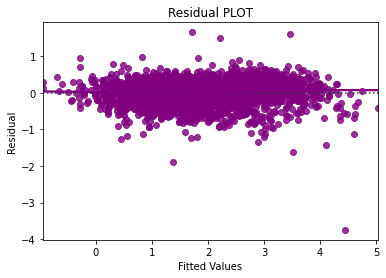

<IPython.core.display.Javascript object>

In [73]:
# predicted values
fitted = olsmodel3.fittedvalues

# sns.set_style("whitegrid")
sns.residplot(fitted, residuals, color="purple", lowess=True)
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Residual PLOT")
plt.show()

Assumptions 4 is satisfied by our olsmodel3. There is no pattern in the residual vs fitted values plot.

### Checking Assumption 5: Normality of error terms

The residuals should be normally distributed.

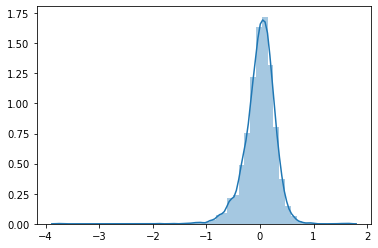

<IPython.core.display.Javascript object>

In [74]:
# Plot histogram of residuals
sns.distplot(residuals)

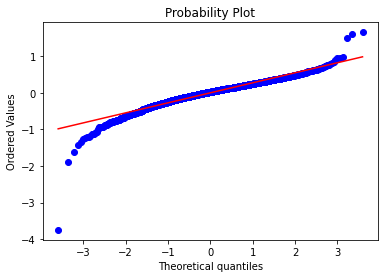

<IPython.core.display.Javascript object>

In [75]:
# Plot q-q plot of residuals
import pylab
import scipy.stats as stats

stats.probplot(residuals, dist="norm", plot=pylab)
plt.show()

The residuals have a close to normal distribution. Assumption 5 is also satisfied.
We should further investigate these values in the tails where we have made huge residual errors.

Now that we have seen that olsmodel3 follows all the linear regression assumptions. Let us use that model to draw inferences.

In [76]:
print(olsmodel3.summary())

                            OLS Regression Results                            
Dep. Variable:              price_log   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     1380.
Date:                Fri, 20 Nov 2020   Prob (F-statistic):               0.00
Time:                        18:47:33   Log-Likelihood:                -643.65
No. Observations:                4213   AIC:                             1341.
Df Residuals:                    4186   BIC:                             1513.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

<IPython.core.display.Javascript object>

## Observations from the model

1. With our linear regression model we have been able to capture ~90 variation in our data.
2. The model indicates that the most significant predictors of price of used cars are - 
    - The year of manufacturing
    - Number of seats in the car
    - Power of the engine
    - Mileage
    - Kilometers Driven
    - Location
    - Fuel_Type
    - Transmission - Automatic/Manual
    - Car Category - budget brand to ultra luxury
    The p-values for these predictors are <0.05 in our final model 
3. Newer cars sell for higher prices. 1 unit increase in the year of manufacture leads to [ exp(0.1170) = 1.12 Lakh ] increase in the price of the vehicle, when everything else is constant.
It is important to note here that the predicted values are log(price) and therefore coefficients have to converted accordingly to understand that influence in Price.
4. As the number of seats increases, the price of the car increases - exp(0.0343) = 1.03 Lakhs
5. Mileage is inversely correlated with Price. Generally, high Mileage cars are the lower budget cars.
It is important to note here that correlation is not equal to causation. That is to say that increase in Mileage does not lead to a drop in prices. It can be understood in such a way that the cars with high mileage do not have a high power engine and therefore have low prices.
6. Kilometers Driven have a negative relationship with the price which is intuitive. A car that has been driven more will have more wear and tear and hence sell at a lower price, everything else being 0.
7. The categorical variables are a little hard to interpret. But it can be seen that all the car_category variables in the dataset have a positive relationship with the Price and the magnitude of this positive relationship increases as the brand category moves to the luxury brands. It will not be incorrect to interpret that the dropped car_category variable for budget friendly cars would have a negative relationship with the price (because the other 3 are increasingly positive.)

# Business Insights and Recommendations

* Our final Linear Regression model has a MAPE of 20% on The test data, which means that we are able to predict within 20% of the price value. This is a very good model and we can use this model in production. 
* Some southern markets tend to have higher prices. It might be a good strategy to plan growth in southern cities using this information. Markets like Kolkata(coeff = -0.2) are very risky and we need to be careful about investments in this area.
* We will have to analyse the cost side of things before we can talk about profitability in the business. We should gather data regarding that.
* The next step post that would be to cluster different sets of data and see if we should make multiple models for different locations/car types.

# Add-on: Analysising predictions where we were way off the mark

In [77]:
# Extracting the rows from original data frame df where indexes are same as the training data
original_df = df[df.index.isin(x_train.index.values)].copy()

# Extracting predicted values from the final model
residuals = olsmodel3.resid
fitted_values = olsmodel3.fittedvalues

# Add new columns for predicted values
original_df["Predicted price_log "] = fitted_values
original_df["Predicted Price"] = fitted_values.apply(math.exp)
original_df["residuals"] = residuals
original_df["Abs_residuals"] = residuals.apply(math.exp)
original_df["Difference in Lakhs"] = np.abs(
    original_df["Price"] - original_df["Predicted Price"]
)

# Let us look at the top 20 predictions where our model made highest extimation errors (on train data)
original_df.sort_values(by=["Difference in Lakhs"], ascending=False).head(100)

,Location,Year,Fuel_Type,Transmission,Owner_Type,Seats,Price,km_per_unit_fuel,engine_num,power_num,new_price_num,Brand,Model,price_log,kilometers_driven_log,Predicted price_log,Predicted Price,residuals,Abs_residuals,Difference in Lakhs
4079,Hyderabad,2017,Diesel,Automatic,First,5.0,160.00,13.33,2993.0,255.000000,230.000000,land,rover,5.075174,10.126631,3.469616,32.124411,1.605558,4.980636,127.875589
3132,Kochi,2019,Petrol,Automatic,First,5.0,2.02,13.33,2995.0,340.000000,136.000000,porsche,cayenne,0.703098,9.567875,4.448254,85.477594,-3.745157,0.023632,83.457594
2100,Mumbai,2010,Petrol,Automatic,Second,5.0,32.00,11.90,4806.0,550.000000,136.000000,porsche,cayenne,3.465736,10.463103,4.594313,98.920185,-1.128577,0.323493,66.920185
5919,Hyderabad,2015,Petrol,Automatic,First,2.0,100.00,12.50,5000.0,488.100000,118.640000,jaguar,f,4.605170,8.987197,5.025459,152.240119,-0.420289,0.656857,52.240119
5088,Coimbatore,2011,Petrol,Automatic,First,4.0,50.66,10.50,5000.0,503.000000,118.640000,jaguar,xj,3.925137,10.684783,4.601514,99.635025,-0.676377,0.508456,48.975025
70,Mumbai,2008,Petrol,Automatic,First,5.0,14.50,8.50,4806.0,500.000000,136.000000,porsche,cayenne,2.674149,11.198215,4.100864,60.392469,-1.426716,0.240096,45.892469
4451,Kochi,2018,Petrol,Automatic,First,4.0,56.80,13.00,4951.0,395.000000,83.920000,ford,mustang,4.039536,9.965993,4.622197,101.717306,-0.582661,0.558410,44.917306
148,Mumbai,2013,Petrol,Automatic,First,4.0,37.00,11.05,2894.0,444.000000,128.000000,audi,rs5,3.610918,10.043249,4.348119,77.332877,-0.737201,0.478451,40.332877
459,Coimbatore,2016,Diesel,Automatic,First,7.0,48.91,11.33,4134.0,335.200000,101.960000,audi,q7,3.889982,10.839620,4.474609,87.760306,-0.584627,0.557313,38.850306
655,Mumbai,2017,Petrol,Automatic,First,5.0,75.00,9.43,1999.0,237.400000,58.286667,jaguar,xj,4.317488,9.259226,3.610550,36.986387,0.706938,2.027773,38.013613


<IPython.core.display.Javascript object>

* A 2017 Land Rover, whose new model sells at 230 Lakhs and the used version sold at 160 Lakhs was predicted to be sold at 32L. It is not apparent after looking at numerical predictors, why our model predicted such low value here. This could be because all other land rovers in our data seems to have sold at lower prices.
* The second one in the list here is a Porsche cayenne that was sold at 2 Lakhs but our model predicted the price as 85.4. This is most likely a data entry error. A 2019 manufactured Porsche selling for 2 Lakh is highly unlikely. With all the information we have, the predicted price 85L seems much more likely. We will be better off dropping this observation from our current model. If possible, the better route would be to gather more information here.
* There are a few instances where the model predicts lesser than the actual selling price. These could be a cause for concern. The model predicting lesser than potential selling price is not good for business.
* Let us quickly visualise some of these observations. 

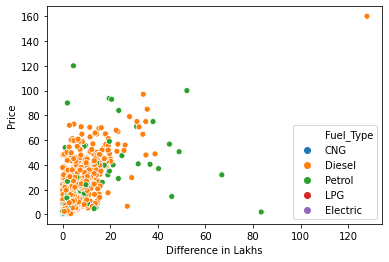

<IPython.core.display.Javascript object>

In [78]:
sns.scatterplot(
    original_df["Difference in Lakhs"],
    original_df["Price"],
    hue=original_df["Fuel_Type"],
)

Most outliers are the Petrol cars. Our model predicts that resale value of diesel cars is higher compared to petrol cars. This is probably the cause of these outliers.